**Oasis InfoByte**

**Data Science Internship Tasks**

**Task 1) "Iris Flower Classification Model" by ABU BAKAR SIDDIQ**

**A Machine Learning Model to Classify Iris Flower Species based on sepal & petal measurements, allowing users to input their own measurements to receive predictions from the trained model.**

**Importing all Necessary Libraires**

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

**Loading DataSet**

In [106]:
data = pd.read_csv('Iris.csv')

**Discovering DataSet**

In [107]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [108]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [109]:
data.shape

(150, 6)

In [110]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [111]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**Displaying Images of Iris-Flower**

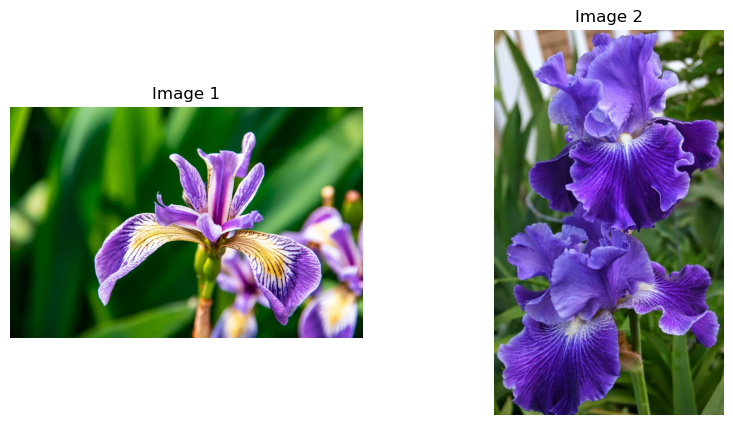

In [112]:
def display_local_images(image_path1, image_path2):
    # Loads the 1st pic
    try:
        img1 = Image.open(image_path1)
    except Exception as e:
        print(f"Error loading image 1: {e}")
        return

    # Loads the 2nd pic
    try:
        img2 = Image.open(image_path2)
    except Exception as e:
        print(f"Error loading image 2: {e}")
        return

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(img1)
    plt.axis('off') 
    plt.title('Image 1')

    plt.subplot(1, 2, 2)
    plt.imshow(img2)
    plt.axis('off') 
    plt.title('Image 2')

    plt.show()

image_path1 = "iris1.jpg"
image_path2 = "iris2.jpg"

display_local_images(image_path1, image_path2)

**Visualizing the Distribution of Species**

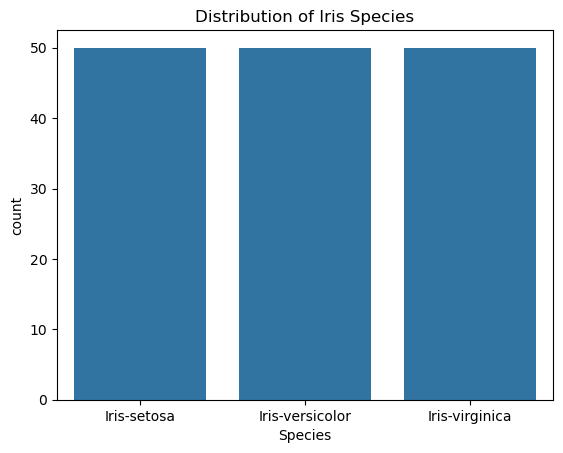

In [113]:
sns.countplot(x='Species', data=data)
plt.title('Distribution of Iris Species')
plt.show()

**Pairplot to Visualize the Relationships**

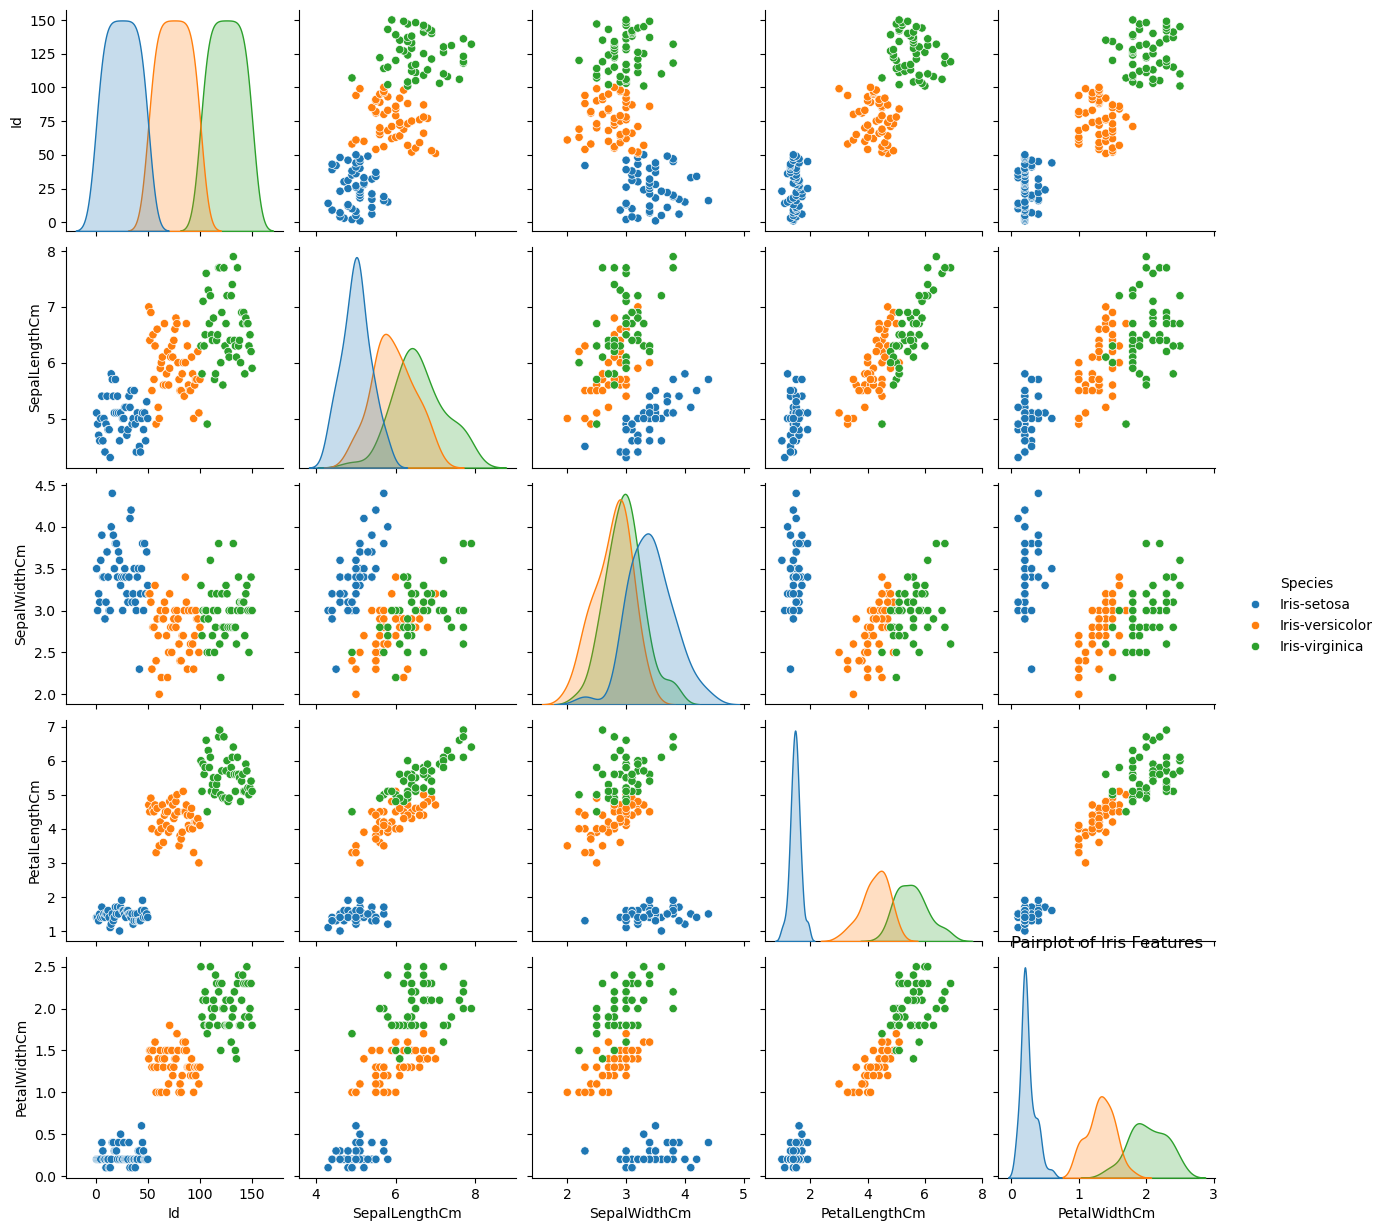

In [114]:
sns.pairplot(data, hue='Species')
plt.title('Pairplot of Iris Features')
plt.show()

**Features & Target Variable**

In [115]:
X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = data['Species']

**Splitting the DataSet Train-Test-Split**

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Standardizing the Features**

In [117]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Using Support Vector Machine for Model-Training**

In [118]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

**Also Using Decision Tree for Model-Training**

In [119]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

**Predictions**

In [120]:
svm_predictions = svm_model.predict(X_test)
dt_predictions = dt_model.predict(X_test)

**Calculating & Displaying Accuracy Scores**

In [121]:
svm_accuracy = accuracy_score(y_test, svm_predictions)
dt_accuracy = accuracy_score(y_test, dt_predictions)

print(f"SVM Accuracy: {svm_accuracy:.2f}")
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")

SVM Accuracy: 0.97
Decision Tree Accuracy: 1.00


**Classification Reports**

In [122]:
print("SVM Classification Report:\n", classification_report(y_test, svm_predictions))

SVM Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [123]:
print("Decision Tree Classification Report:\n", classification_report(y_test, dt_predictions))

Decision Tree Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



**Displaying the Confusion Matrix**

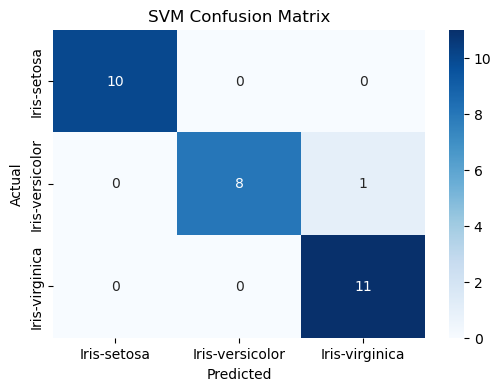

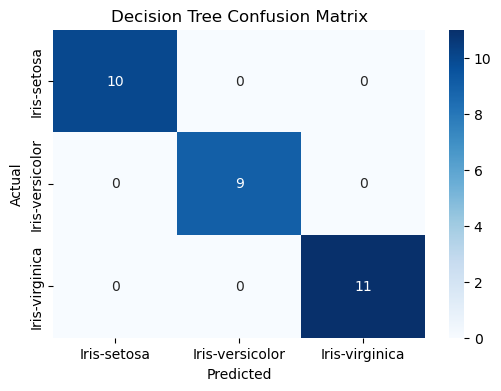

In [124]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data['Species'].unique(), yticklabels=data['Species'].unique())
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_confusion_matrix(y_test, svm_predictions, 'SVM Confusion Matrix')
plot_confusion_matrix(y_test, dt_predictions, 'Decision Tree Confusion Matrix')

**Visualizing Actual vs Predicted Values**

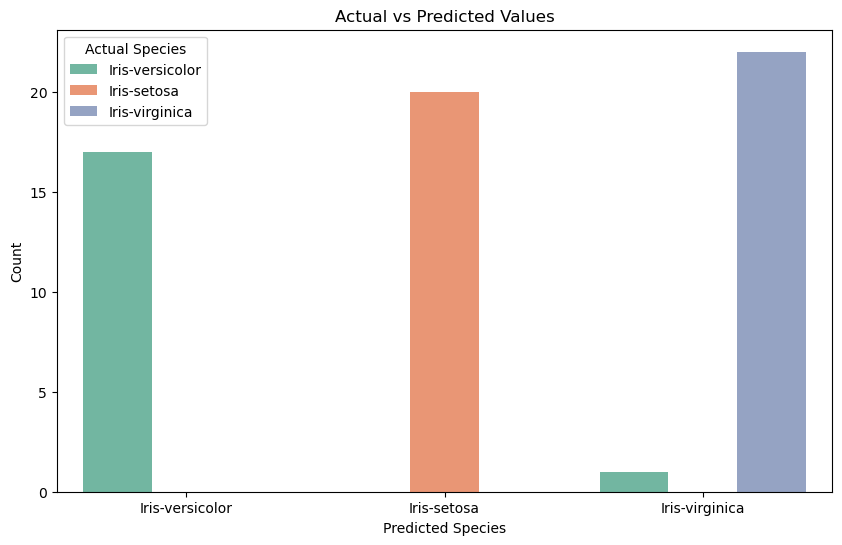

In [125]:
results = pd.DataFrame({'Actual': y_test, 'SVM Predicted': svm_predictions, 'Decision Tree Predicted': dt_predictions})

plt.figure(figsize=(10, 6))
sns.countplot(data=results.melt(id_vars='Actual', value_vars=['SVM Predicted', 'Decision Tree Predicted']),
               x='value', hue='Actual', palette='Set2')
plt.title('Actual vs Predicted Values')
plt.xlabel('Predicted Species')
plt.ylabel('Count')
plt.legend(title='Actual Species')
plt.show()

**Train-Test Dataset Size**

In [126]:
print(f"Training set size: {X_train.shape[0]}")

Training set size: 120


In [127]:
print(f"Test set size: {X_test.shape[0]}") 

Test set size: 30


In [128]:
results['SVM Correct'] = results['Actual'] == results['SVM Predicted']
results['DT Correct'] = results['Actual'] == results['Decision Tree Predicted']

svm_correct_count = results['SVM Correct'].value_counts()
dt_correct_count = results['DT Correct'].value_counts()

print("SVM Algorithm Predictions - Correct vs Incorrect:")
print(svm_correct_count)

SVM Algorithm Predictions - Correct vs Incorrect:
SVM Correct
True     29
False     1
Name: count, dtype: int64


In [129]:
print("Decision Tree Algorithm Predictions - Correct vs Incorrect:")
print(dt_correct_count)

Decision Tree Algorithm Predictions - Correct vs Incorrect:
DT Correct
True    30
Name: count, dtype: int64


**Visualizing Correct vs Incorrect Predictions**

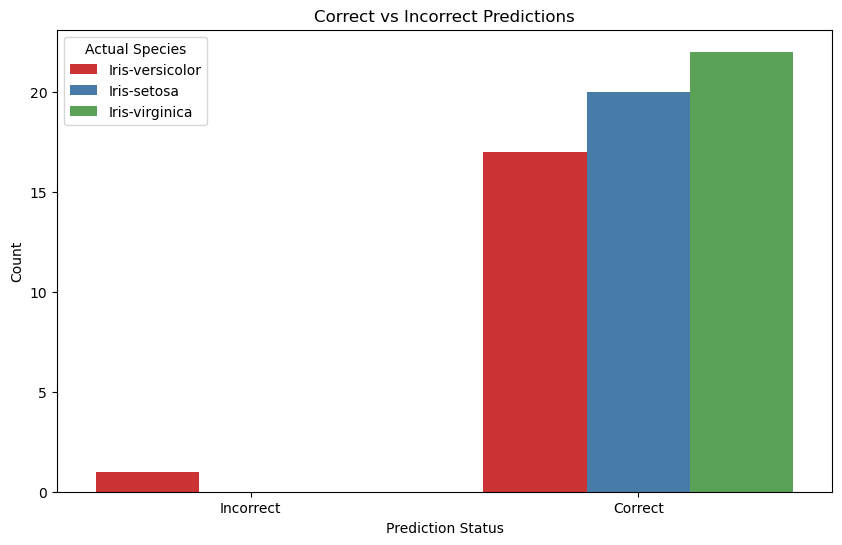

In [130]:
plt.figure(figsize=(10, 6))
sns.countplot(data=results.melt(id_vars='Actual', value_vars=['SVM Correct', 'DT Correct']),
               x='value', hue='Actual', palette='Set1')
plt.title('Correct vs Incorrect Predictions')
plt.xlabel('Prediction Status')
plt.ylabel('Count')
plt.xticks([0, 1], ['Incorrect', 'Correct'])
plt.legend(title='Actual Species')
plt.show()

**Based on User-input Iris Flower Model will Predict the Iris-Specie**

In [132]:
def predict_iris_species():
    # Get user input for Iris flower features
    sepal_length = float(input("Iris Flower Classification Model Will Predicts the Flower\nEnter Sepal Length (cm): "))
    sepal_width = float(input("Enter Sepal Width (cm): "))
    petal_length = float(input("Enter Petal Length (cm): "))
    petal_width = float(input("Enter Petal Width (cm): "))

    # Create a feature array from user input
    user_input = [[sepal_length, sepal_width, petal_length, petal_width]]

    # Standardize the user input
    user_input = scaler.transform(user_input)

    # Make predictions using the trained models
    svm_prediction = svm_model.predict(user_input)[0]
    dt_prediction = dt_model.predict(user_input)[0]

    # Recommend the species based on the predictions
    print("\nRecommendations:")
    print(f"SVM model predicts: {svm_prediction}")
    print(f"Decision Tree model predicts: {dt_prediction}")

    if svm_prediction == dt_prediction:
        print(f"Both models agree, the Iris flower is likely {svm_prediction}.")
    else:
        print("The models disagree on the Iris species prediction.")

# Call the prediction function
predict_iris_species()

Iris Flower Classification Model Will Predicts the Flower
Enter Sepal Length (cm):  4
Enter Sepal Width (cm):  4
Enter Petal Length (cm):  5
Enter Petal Width (cm):  4



Recommendations:
SVM model predicts: Iris-virginica
Decision Tree model predicts: Iris-virginica
Both models agree, the Iris flower is likely Iris-virginica.


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
